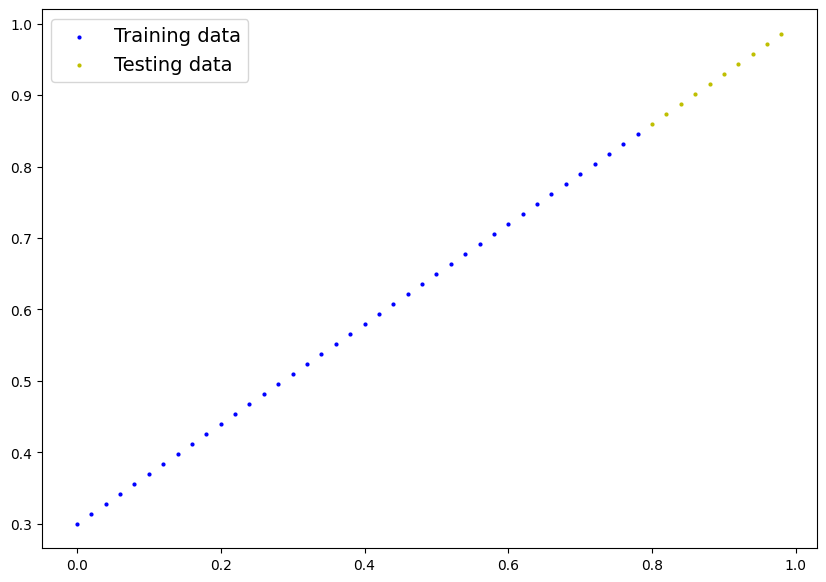

In [11]:
import torch
from torch import nn 
import matplotlib.pyplot as plt

## Data (preparing and loading)

# y=a+bX

weight= 0.7
bias= 0.3
start= 0
end= 1
step= 0.02
X= torch.arange(start,end,step).unsqueeze(dim=1)

y= weight*X+bias


## spliting data into training and test sets

train_split= int(0.8*len(X))

X_train, y_train= X[:train_split], y[:train_split]
X_test, y_test= X[train_split:], y[train_split:]


## plot training data,test data, and compare predictions

def plot_prediction(train_data=X_train,
                    train_labels= y_train,
                    test_data= X_test,
                    test_labels= y_test,
                    predictions=None):
 
 plt.figure(figsize=(10,7))
 #training data in blue
 plt.scatter(train_data,train_labels,c="b", s=4 ,label="Training data")
 
 plt.scatter(test_data,test_labels,c="y", s=4, label="Testing data")
 
 if predictions is not None: #the prediction should be compared to the test labels..
     plt.scatter(test_data,predictions,c="r", s=4, label="predictions")

 plt.legend(prop={"size":14})
 plt.show()


plot_prediction()


class LinearRegression(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        self.weights = nn.Parameter(torch.randn(1,
                                              requires_grad=True,
                                              dtype=torch.float))
        
        self.bias = nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                           dtype=torch.float))
        
    def forward(self,x:torch.Tensor):
        return self.weights * x + self.bias
        
        
        

In [2]:
torch.manual_seed(42)
model_0=LinearRegression()
list(model_0.parameters())# check out the parametes of the model
model_0.state_dict()# list the parameters by their names and values

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

Making prediction using "torch.inference_mode()"
Predict y_test based on x_test (make some predictions (y) close to some labels (y in the training set))

In [3]:
X_test,y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [4]:
#Make predictions with model
# by inference we don't need to keep track of gradient, when you just want to see the predictions making the pytorch runs faster
# in inference we don't train the model

with torch.inference_mode():
    y_pred = model_0(X_test)



yout=model_0(X_test)



with torch.no_grad():
    yout2=model_0(X_test)




y_pred,yout,yout2

(tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]),
 tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]], grad_fn=<AddBackward0>),
 tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]))

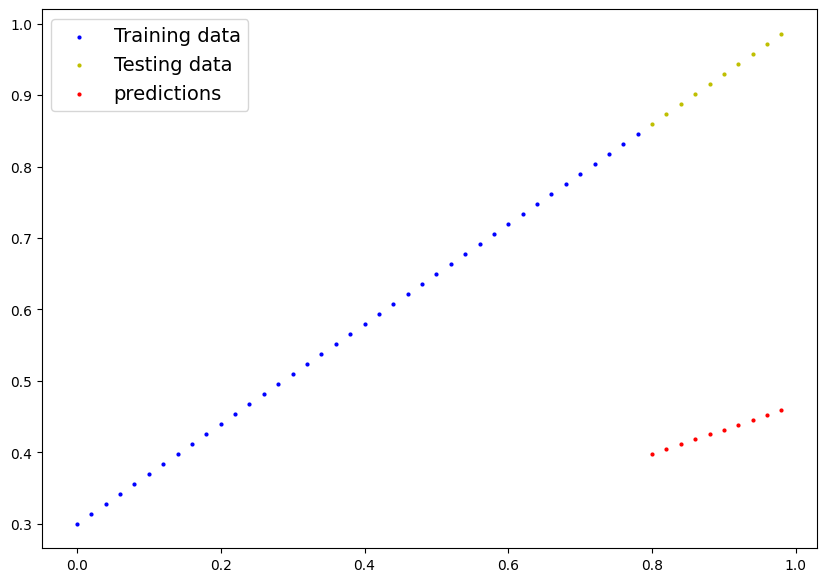

In [5]:
plot_prediction(predictions=y_pred)

Train model

the whole idea of trainig a model is for a model to move from unknown parameters to some known parametes.
that's why we use loss function to make the model learn and improve predictions

loss function: measures how wrong our model's predictions are to the ideal output


optimizer: takes into account the loss of model and adjust the model's parameters (like weights and biases in our case) to improve the loss function ** it adjust parameters to reduce the loss

In [6]:
# setup a loss function
loss_fn = nn.L1Loss()

# setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD (params = model_0.parameters(), lr = 0.001 )

# the smaller learning rate the smaller change in the parameter
# the larger lr the larger change

# param, the parameters need to be adgjested

# building a training loop
0. loop through data
1. fw pass: to make predictation on data
2. calculate the loss (y-pred vs y-train)
3. optimize zero grad
4. loss bw to calculate the gradient of each of the parameter of the model with respect to the loss
5. optimizer step: use the optimizer to adjust the model's parameters to try and imrove the loss



In [7]:
# an epoch is one loop through the data
epochs=500

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []





# 0. loop through the data

for epoch in range (epochs):
    # set the model to training mode
    model_0.train()
    #1. FW pass
    y_pred =model_0(X_train)
    
    # 2. loss
    loss = loss_fn (y_pred,y_train)
    
    # 3. optimizer zero grad
    
    optimizer.zero_grad() # set it to zero to start fresh in each iteration
    
    # 4. backpropagation on the loss with respect to the parameters
    
    loss.backward()
    
    # 5. step the optimizer (perform gradient descent)
    optimizer.step()
    
# testing
    model_0.eval()# turn off gradint tracking

    with torch.inference_mode():
        
        #  1. fw
        test_pred = model_0(X_test)
        
        # 2. calculate the loss
        
        test_loss = loss_fn (test_pred, y_test)
    
    
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)


        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
        print (model_0.state_dict())    
    
    
    
#print(f"loss: {loss}")

Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.4931890368461609
OrderedDict([('weights', tensor([0.3371])), ('bias', tensor([0.1298]))])
Epoch: 10 | Loss: 0.3013603389263153 | Test loss: 0.4797181189060211
OrderedDict([('weights', tensor([0.3410])), ('bias', tensor([0.1398]))])
Epoch: 20 | Loss: 0.28983938694000244 | Test loss: 0.4662471413612366
OrderedDict([('weights', tensor([0.3449])), ('bias', tensor([0.1498]))])
Epoch: 30 | Loss: 0.2783183455467224 | Test loss: 0.4527761936187744
OrderedDict([('weights', tensor([0.3488])), ('bias', tensor([0.1598]))])
Epoch: 40 | Loss: 0.26679736375808716 | Test loss: 0.43930521607398987
OrderedDict([('weights', tensor([0.3527])), ('bias', tensor([0.1698]))])
Epoch: 50 | Loss: 0.2552763819694519 | Test loss: 0.4258342385292053
OrderedDict([('weights', tensor([0.3566])), ('bias', tensor([0.1798]))])
Epoch: 60 | Loss: 0.24375538527965546 | Test loss: 0.41236335039138794
OrderedDict([('weights', tensor([0.3605])), ('bias', tensor([0.1898]))])
E

Epoch: 300 | Loss: 0.05357731133699417 | Test loss: 0.15086300671100616
OrderedDict([('weights', tensor([0.4485])), ('bias', tensor([0.3730]))])
Epoch: 310 | Loss: 0.05218071490526199 | Test loss: 0.14595307409763336
OrderedDict([('weights', tensor([0.4513])), ('bias', tensor([0.3754]))])
Epoch: 320 | Loss: 0.05105169489979744 | Test loss: 0.1415499746799469
OrderedDict([('weights', tensor([0.4540])), ('bias', tensor([0.3774]))])
Epoch: 330 | Loss: 0.050030313432216644 | Test loss: 0.1374681293964386
OrderedDict([('weights', tensor([0.4567])), ('bias', tensor([0.3791]))])
Epoch: 340 | Loss: 0.049160152673721313 | Test loss: 0.13370750844478607
OrderedDict([('weights', tensor([0.4592])), ('bias', tensor([0.3806]))])
Epoch: 350 | Loss: 0.04836020991206169 | Test loss: 0.13020753860473633
OrderedDict([('weights', tensor([0.4617])), ('bias', tensor([0.3819]))])
Epoch: 360 | Loss: 0.04769856110215187 | Test loss: 0.12709848582744598
OrderedDict([('weights', tensor([0.4640])), ('bias', tenso

In [8]:
print (model_0.state_dict())    


OrderedDict([('weights', tensor([0.4922])), ('bias', tensor([0.3840]))])


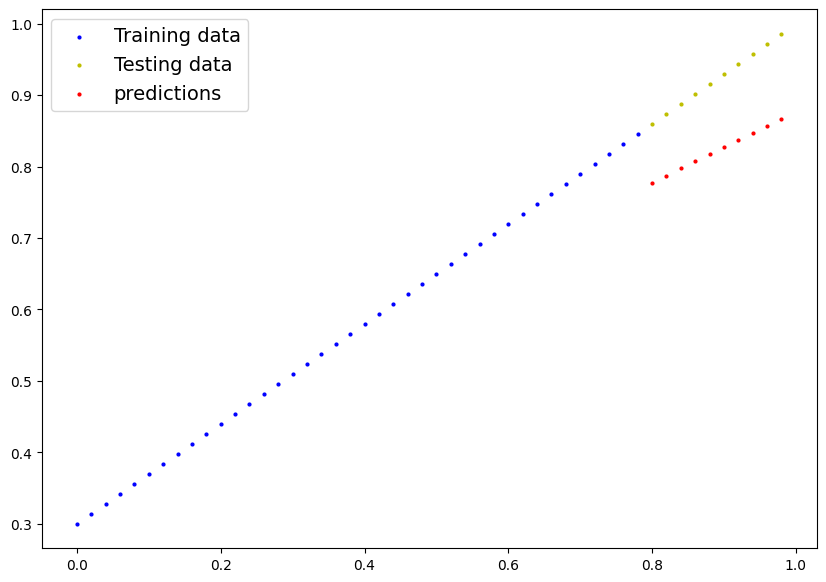

In [9]:
with torch.inference_mode():
    y_pred = model_0(X_test)


plot_prediction(predictions=y_pred)  

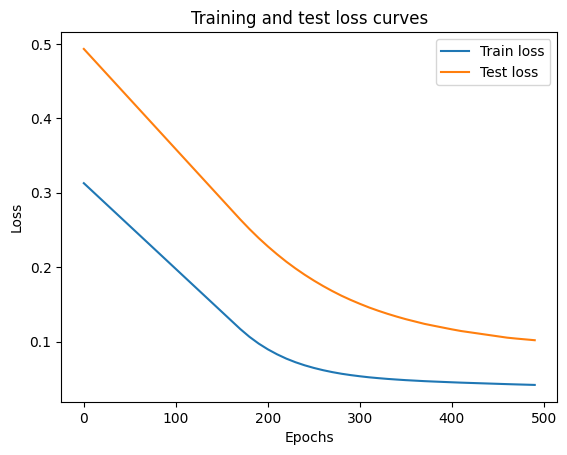

In [10]:
# plot the loss curves

import numpy as np
#np.array(torch.tensor(loss_values).cpu().numpy())

plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()),label="Train loss")
plt.plot(epoch_count, test_loss_values , label="Test loss")
plt.title ("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel ("Epochs")
plt.legend()



saving a model in Pytorch


1.torch.save()


2.torch.load()



3.torch.nn.Module.load_state_dict() -- load a model's saved state dictionary



In [14]:
# saving our model

from pathlib import Path


# 1. create models directory

Model_Path=Path("models")
Model_Path.mkdir(parents=True,exist_ok=True) 

# 2. create model save path
Model_name="01_Pytorch.pth"
Model_save_path=Model_Path/Model_name

# 3. save the model state dict
print(f"saving model to: {Model_save_path}")
torch.save(obj=model_0.state_dict(),f=Model_save_path)




saving model to: models/01_Pytorch.pth


In [24]:
# loading a model
# we just save the state of model to load this we need to create a new instance of our model class

loaded_model_0=LinearRegression()

# load the saved state_dict
loaded_model_0.load_state_dict((torch.load(f=Model_save_path)))

<All keys matched successfully>

In [26]:
loaded_model_0.state_dict(),model_0.state_dict()

(OrderedDict([('weights', tensor([0.4922])), ('bias', tensor([0.3840]))]),
 OrderedDict([('weights', tensor([0.4922])), ('bias', tensor([0.3840]))]))

In [29]:
#make predictions with loaded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)
    
    
loaded_model_preds==y_pred


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])